This is a data wrangling project on the datasets from the twitter account [WeRateDogs](https://twitter.com/dog_rates). There are three datasets used in this roject namely twitter_archive_enhanced.csv and mage_prediction.tsv
[link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) and the tweet_json.txt which is obtained from the Twitter API.
The data wrangling of this project begins with data gathering followed by assessment and cleaning. Later, the datasets are analysed and visualised and finally merged into a single dataset and tored as a csv file.

In [1]:
# Control the width of the Jupyternotebook cell

from IPython.core.display import display, HTML

display(HTML("<style>.container { width:75% !important; }</style>"))


### 1. Importing relevant packages

In [2]:
# Relevant libraries to work on this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import json
import requests
import os 


### 2. Gathering Data 

This includes downloading datastes from the Udacity website and downloading programmitically from the interent ( which internet?)retrieving data from the internet and downloading programmatically into local directory. Then accessing the data from the current directory for farther investigation of the datasets.

In [3]:

# Accessing the image predictions file from the internet. 
def downloading_file(url):
    
    ''' This function downloads a url file into the current directory'''
    
    
    response = requests.get(url)
    
    with open("image_predictions.tsv", "wb") as file_object:
        
        return file_object.write(response.content)
     
image_prediction_url = downloading_file("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")    


# Reading the written "image_preditions.tsv" file 

def read_tsv_file(tsv_file):
    
    ''' Thus function reads the image_prections.tsv file which was downloaded by the downloading_file function and returns a pandas DataFrame'''
    
    
    with open(tsv_file, "r") as f:
        
        
        df = pd.read_csv(f, sep = "\t")
    
    return df

image_predictions_df = read_tsv_file("image_predictions.tsv")

image_predictions_clean = image_predictions_df.copy()  # copy from the original DataFrame to avoid unncessary change in the original data

In [4]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [5]:
# Reading the twitter archive enhanced.csv file

def reading_csv_files(file):
    
    ''' This functions reads a csv file and returns a pandas DataFrame of that file'''
    
    with open(file, "r", encoding = "utf-8") as file_object:
         
        df = pd.read_csv(file_object, sep = ",")
        
    return df

twitter_archive_df = reading_csv_files("01_twitter-archive-enhanced.csv")

twitter_archive_clean = twitter_archive_df.copy()

In [6]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [7]:
twitter_archive_df.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:

def reading_txt_files(file):
    
    ''' This functions reads a txt file and returns a pandas DataFrame of that file'''

    data= []
    with open(file, "r", encoding = "utf-8") as file_object:
        
        
        for line in file_object:
            
            data.append(json.loads(line))

    return data

tweet = reading_txt_files("03_tweet-json.txt")


data_dict = { "id":[], "retweet_count":[], "favorite_count": [], "lang":[], "followers_count":[]}

for  data in tweet:
    
    data_dict["id"].append(data["id"])
    data_dict["retweet_count"].append(data["retweet_count"])
    data_dict["favorite_count"].append(data["favorite_count"])
    data_dict["lang"].append(data["lang"])
    data_dict["followers_count"].append(data["user"]["followers_count"])

    
tweet_df = pd.DataFrame(data_dict, index = [i for i in range(len(data_dict["id"]))])   

tweet_clean = tweet_df.copy()

In [9]:
tweet_clean.head()

,id,retweet_count,favorite_count,lang,followers_count
0,892420643555336193,8853,39467,en,3200889
1,892177421306343426,6514,33819,en,3200889
2,891815181378084864,4328,25461,en,3200889
3,891689557279858688,8964,42908,en,3200889
4,891327558926688256,9774,41048,en,3200889


In [10]:
#tweet_clean.groupby("followers_count")["lang"].value_counts().sort_values(ascending = False)/tweet_clean.shape[0]

### 3. Assessing data 

###### 3.1 Assessing the image_predictions data:

In [11]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
# Check for the data type:

image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


As we can see from the above, the data type of the DataFrame "image_predictions_clean" is in good format.

In [13]:
# The following issues are found in the impage_predictions_clean data: 

# 1. The column names are not descriptive: for example it is difficult to understand what the column names p1,  p1_conf mean represent

# 2. The values in the p1, p2, p3 are not connsistent, some start with capital letter and others with small letter. This should be uniform.

In [14]:
# Check for possible missing values in the key ( tweet_id):

image_predictions_clean["tweet_id"].isnull().sum()  # There is no missing values in the data.

0

In [15]:
# Checking missing values in the complete dataset:

image_predictions_clean.isnull().sum()  # The whole dataset is complete ( no missing values are observed)

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
# Check for duplicated rows

image_predictions_clean[image_predictions_clean["tweet_id"].duplicated()]  # No duplicated rows are found in the dataset

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 3.2 Assessing the twitter_archive_clean data 

In [17]:
twitter_archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
# Checking for possible missing values in the dataset:

twitter_archive_clean.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:

twitter_archive_df.isnull().sum()/twitter_archive_df.shape[0]


tweet_id                      0.000000
in_reply_to_status_id         0.966893
in_reply_to_user_id           0.966893
timestamp                     0.000000
source                        0.000000
text                          0.000000
retweeted_status_id           0.923175
retweeted_status_user_id      0.923175
retweeted_status_timestamp    0.923175
expanded_urls                 0.025042
rating_numerator              0.000000
rating_denominator            0.000000
name                          0.000000
doggo                         0.000000
floofer                       0.000000
pupper                        0.000000
puppo                         0.000000
dtype: float64

As we can see above, the in reply ids, the retweet statuses are almost missing. These should be dropped.

In [21]:
twitter_archive_clean["in_reply_to_status_id"].isnull().sum() 

2278

In [22]:
values = {"in_reply_to_status_id":"","in_reply_to_user_id":"","retweeted_status_id":"",
          "retweeted_status_user_id": "","retweeted_status_timestamp": "" }

for key in values.keys():
    
    values[key] = twitter_archive_clean.shape[0]-twitter_archive_clean[key].isnull().sum()
    values_df = pd.DataFrame(values,index =[0])

In [23]:
values_df  # we see from this that, almost all their values are missing.  

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
0,78,78,181,181,181


#### Issues in the twitter_archive_clean data:



1. The columns in_reply_to_status_id and in_reply_to_user_id and retweeted_status_timestamp contain almost missing values. 
2. The data type of the timestamp found to be a object(string), this should be converted into datetime  
3. In the "name" column, some names are "a" which I believe a mistake and some "None". The name also should be consistent (small letter or capitalised)
4. Structural issue; the dog types should be in one column assuming one dog is from one type. So we need to create a column called 
dog_type
5. The column "text" contains a text, numbers ( numerator and denominator) and url at the end of each text. 
The text and the url should be in separated columns. The numbers in the text which represents the denominator and numerator should be disregarded
 becasue they have aldeady columns (rating_numerator and rating_denominator). 

Questions
6. What is the difference between the source and the expaned_urls and the webiste at the end of the text column?


###### 3.3 Assessing the tweet_clean:

In [24]:
tweet_clean.head()   # This dataset is in good quality excelpt I have to change the lang to langauge. 

,id,retweet_count,favorite_count,lang,followers_count
0,892420643555336193,8853,39467,en,3200889
1,892177421306343426,6514,33819,en,3200889
2,891815181378084864,4328,25461,en,3200889
3,891689557279858688,8964,42908,en,3200889
4,891327558926688256,9774,41048,en,3200889


In [25]:
# Check the consistency of data type:

tweet_clean.info()   # The data type is in good stand. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   int64 
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   lang             2354 non-null   object
 4   followers_count  2354 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 110.3+ KB


In [26]:
# Checking for possible missing values:

tweet_clean.isnull().sum()  # No missing values are found in this dataset.

id                 0
retweet_count      0
favorite_count     0
lang               0
followers_count    0
dtype: int64

In [27]:
# Checking for duplication:

tweet_clean[tweet_clean.duplicated()]  # No duplicated values are found in this dataset.

,id,retweet_count,favorite_count,lang,followers_count


### 4 Cleaning data  : tweet_clean data

#### 4.1. Define: 

In [28]:
# replace the  "lang" column by language:

#### 4.2 Code :

In [29]:
tweet_clean.rename(columns = {"lang":"language"}, inplace = True)  # Renaming the column lang by language 

#### 4.3 Test: 

In [30]:
tweet_clean.columns==tweet_df.columns # Compare the column names of the original and that of tweet_clean after the "lang" is renamed by "langauge"
tweet_clean.columns  # # So we can see that columnn name is changed.

Index(['id', 'retweet_count', 'favorite_count', 'language', 'followers_count'], dtype='object')

### 4 Cleaning data  : image_predictions_clean

In [31]:
image_predictions_df.sample(39)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
281,671122204919246848,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,1,goose,0.351957,False,Chihuahua,0.101228,True,hen,0.065818,False
165,668979806671884288,https://pbs.twimg.com/media/CUixld6WoAArDrJ.jpg,1,golden_retriever,0.608537,True,Irish_setter,0.097078,True,redbone,0.076022,True
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
641,681320187870711809,https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg,1,Samoyed,0.362596,True,Eskimo_dog,0.245395,True,Siberian_husky,0.108232,True
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
1309,754011816964026368,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,jack-o'-lantern,0.999306,False,basketball,0.000113,False,standard_poodle,0.000083,True
1421,772102971039580160,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True


#### 4.1. Define: 

 The following issues are addressed in the image_prediction_clean data
- Rename the columns with more descriptive names.
- Capitalize each letter of the values in the p1, p2, p3 columns.
- Replace "-" by "_" in the prediction1-3 

#### 4.2 Code :

In [32]:
# 1. Renaming of the columns:

image_predictions_clean.rename(columns = 
                               {"p1": "predict1", "p1_conf":"predict1_conf", "p1_dog": "predict1_dog", 
                               "p2":"predict2", "p2_conf":"predict2_conf", "p2_dog":"predict2_dog",
                               "p3":"predict3", "p3_conf": "predict3_conf", "p3_dog":"predict3_dog", "jpg_url": "image_url", "img_num": "image_num"}, inplace = True)

In [33]:
# 2. Capitalize first letter of each word in the predict1, predict2, and predict3 columns.

column_predictions = ["predict1", "predict2","predict3"]  # List of the columns I am interested in changing the values. 

for column_predict in column_predictions:
    
    image_predictions_clean[column_predict] =  image_predictions_clean[column_predict].apply(lambda x: x.title())


In [34]:
#3. Replace "-" by "_" in the predicted names wherever "-" exitsts between a couple of names

column_predictions = ["predict1", "predict2","predict3"]  # List of the columns I am interested in changing the values. 

for column_predict in column_predictions:
    
    image_predictions_clean[column_predict] =  image_predictions_clean[column_predict].apply(lambda x: x.replace("-", "_"))


#### 4.3 Test: 

In [35]:
image_predictions_clean.columns # Column names are renamed as planned. 

Index(['tweet_id', 'image_url', 'image_num', 'predict1', 'predict1_conf',
       'predict1_dog', 'predict2', 'predict2_conf', 'predict2_dog', 'predict3',
       'predict3_conf', 'predict3_dog'],
      dtype='object')

In [36]:
(image_predictions_clean["predict1"][1], image_predictions_df["p1"][1])# Comparing with the original data, we are sure that the change has taken place. 

('Redbone', 'redbone')

### 4 Cleaning data  : twitter_archive_clean

#### 4.1. Define: 

 Issues to be addressed in the twitter_archive_clean data:

- Drop the columns in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id ,retweeted_status_timestamp contain almost missing values.

- Convert the data tpye of timestamp into datetime.
- Replace any value in the name column which is less than two letters by None. Capitalize for each name. 
- Create a column called dog_type and populate it by the values in each of the columns ( flooter,doggo, pupper and puppo) then drop the four columns.
- Extract the sentences and url from the "text" column and create two columns and populate the sententeces and ulr in separated columns. Then drop the original column "text" 


#### 4.2 Code :

In [37]:
# Drop the following columns which are dominated by missing values:

columns_drop = values = ["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id",
          "retweeted_status_user_id","retweeted_status_timestamp"]

twitter_archive_clean.drop(columns_drop, axis = 1, inplace = True)

In [38]:
# Convert the data type of timestamp into datetime

twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

In [39]:
# I asume names of one length meaning an alphabet, I consider this is a type error, therefore decided to replace by None.
wrong_names = []

for x in twitter_archive_clean["name"]:
    if len(x) <2:
        
        wrong_names.append(x)
        
print(len(wrong_names), wrong_names)

56 ['a', 'a', 'O', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']


In [40]:
#Replace the "a"s and "O" by None

twitter_archive_clean["name"] = twitter_archive_clean["name"].replace({"a":None, "O":None})


In [41]:
twitter_archive_clean[twitter_archive_clean["name"]=="a"]  # We are certain that the change has taken place. 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
twitter_archive_clean[twitter_archive_clean["name"]=="O"]  # We are certain that the change has taken place. 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [43]:
# Capitalize the first letter in each dog name:

twitter_archive_clean["name"]= twitter_archive_clean["name"].str.title()

In [44]:
# Create a new column called dog_type and populate it from the doggo, floofer, pupper and puppo:

dog_type = []

for dog_type1, dog_type2, dog_type3, dog_type4 in zip(twitter_archive_clean.doggo.tolist(),twitter_archive_clean.floofer.tolist(), twitter_archive_clean.pupper.tolist(), twitter_archive_clean.puppo.tolist()):
    
    if dog_type1 == "doggo":
        
        dog_type.append(dog_type1)
    elif dog_type2 == "flooter":     
        
        dog_type.append(dog_type2)
        
    elif dog_type3 == "pupper":
             
        dog_type.append(dog_type3)
        
    elif dog_type4 == "puppo":
        
        dog_type.append(dog_type4)
        
    else:
        
        dog_type.append(None) 
        
twitter_archive_clean["dog_type"]= dog_type

In [45]:
columns_drop = values = ["doggo","floofer","pupper",
          "puppo"]

twitter_archive_clean.drop(columns_drop, axis = 1, inplace = True)

In [46]:
# Extract the sentences from the text column.

twitter_archive_clean["url"]= twitter_archive_clean.text.str.extract('(\w+\S\/\/\w[\.*\D\d\/*]+)', expand= True)  # Extracting the url at from the end the data values in the text column. 


In [47]:
# Extract the sentences in the text column:

twitter_archive_clean["text_sentence"]= twitter_archive_clean.text.str.extract('([A-Z][a-z]\D+)+', expand= True)  # Extracting the sentences from the text columns.


In [48]:
twitter_archive_clean.drop("text", axis = 1, inplace = True)

#### 4.3 Test: 

In [49]:
twitter_archive_clean.sample(5) # The data looks good, the columns with missing values are dropped and new columns are created and populated. 

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_type,url,text_sentence
457,818145370475810820,2017-01-08 17:20:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/818145370...,11,10,Autumn,None,https://t.co/JlPug12E5Z,This is Autumn. Her favorite toy is a cheesebu...
386,826615380357632002,2017-02-01 02:17:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/809920764...,10,10,None,None,NaN,"Please only send in dogs. We only rate dogs, n..."
2312,666776908487630848,2015-11-18 00:36:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,https://t.co/XNGeDwrtYH,This is Josep. He is a Rye Manganese mix. Can ...
1196,717047459982213120,2016-04-04 17:53:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/717047459...,12,10,Flávio,None,https://t.co/fGgleFiBPq,This is Flávio (pronounced Baxter). He's a Ben...
2321,666435652385423360,2015-11-17 02:00:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666435652...,10,10,None,None,https://t.co/GlFZPzqcEU,"Can you behave? You're ruining my wedding day""..."


In [50]:
twitter_archive_clean.dtypes # The data type of the teimestamp is converted into datetime as we see below. 

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_type                           object
url                                object
text_sentence                      object
dtype: object

In [51]:
twitter_archive_clean[twitter_archive_clean["name"]=="a"] # Making sure that the "a"s names no more exists ( replaced by None)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_type,url,text_sentence


In [52]:
twitter_archive_clean[twitter_archive_clean["name"]=="O"] # Checking that no longer the "O" name exists ( replaced by None)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_type,url,text_sentence


### 5.  Analysis  and visualization


- Which dog does have the highest favorite count and rating?
- Which prediction algorithm was the most successful in identifying wether the animal was a dog or not? 


In [67]:
# The rating_denominator has zero values and this has to be replaced by NaN.
# Because we cannot perform division operation to obtain the rating ratio( rating_numerator/rating_denominator)

twitter_archive_clean["rating_denominator"]= twitter_archive_clean["rating_denominator"].replace(0, np.nan)

twitter_archive_clean["rating_ratio"] = twitter_archive_clean["rating_numerator"]/twitter_archive_clean["rating_denominator"]  # Caculating the ratio of the two ratings:


###### Merging the data frames into a single pandas DataFrame

In [54]:
# Merging the data frames: 

twitter_archive_tweet = pd.merge(twitter_archive_clean,tweet_clean, left_on = "tweet_id", right_on = "id", how="inner")

twitter_archive_tweet.drop(columns= "id", inplace = True)  # Drop the id to avoid repeatation of data as this is represented by tweet_id

df_all = pd.merge(twitter_archive_tweet, image_predictions_clean, on = "tweet_id", how ="inner")

df_all.head(3)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_type,url,text_sentence,...,image_num,predict1,predict1_conf,predict1_dog,predict2,predict2_conf,predict2_dog,predict3,predict3_conf,predict3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


In [68]:
# Which dog does have the highest rating?

df_all.sort_values(by ="rating_ratio", ascending = False).head(2)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_type,url,text_sentence,...,image_num,predict1,predict1_conf,predict1_dog,predict2,predict2_conf,predict2_dog,predict3,predict3_conf,predict3_dog
802,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",https://twitter.com/dog_rates/status/749981277...,1776,10.0,Atticus,None,https://t.co/GRXwMxLBkh,This is Atticus. He's quite simply America af.,...,1,Bow_Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False
1795,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/670842764...,420,10.0,None,None,https://t.co/yfAAo1gdeY,After so many requests... here you go.\n\nGood...,...,1,Microphone,0.096063,False,Accordion,0.094075,False,Drumstick,0.061113,False


In [71]:
df_all.sort_values(by ="rating_ratio", ascending = False)["rating_ratio"].tail()

1812    0.1
1979    0.1
1596    0.1
249     0.0
832     0.0
Name: rating_ratio, dtype: float64

The dog with the highest rating was Atticus despite the fact that this dog has the highest rating, the algorithms identified as an object "Bow_Tie", "Sunglass" respectively.

In [56]:
df_all.sort_values(by = "favorite_count", ascending = False).head(3)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_type,url,text_sentence,...,image_num,predict1,predict1_conf,predict1_dog,predict2,predict2_conf,predict2_dog,predict3,predict3_conf,predict3_dog
329,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/822872901...,13,10.0,None,puppo,https://t.co/nTz3FtorBc,Here's a super supportive puppo participating ...,...,1,Lakeland_Terrier,0.196015,True,Labrador_Retriever,0.160329,True,Irish_Terrier,0.069126,True
851,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/744234799...,13,10.0,None,doggo,https://t.co/7wE9LTEXC4,Here's a doggo realizing you can stand in a po...,...,1,Labrador_Retriever,0.825333,True,Ice_Bear,0.044681,False,Whippet,0.018442,True
59,879415818425184262,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/879415818...,13,10.0,Duddles,None,https://t.co/UDT7ZkcTgY,This is Duddles. He did an attempt.,...,1,English_Springer,0.383404,True,Boston_Bull,0.134967,True,Cardigan,0.110481,True


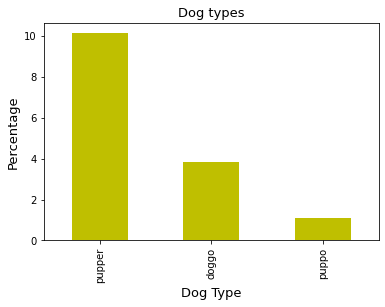

In [57]:
ax = (((df_all["dog_type"].value_counts().sort_values(ascending = False))/df_all.shape[0])*100).plot(kind ="bar", color = "y");# 31% of the dogs names is not mentioned. 

ax.set_xlabel("Dog Type", fontsize = 13);

ax.set_ylabel("Percentage", fontsize = 13);

ax.set_title("Dog types", fontsize = 13);

In [58]:
(df_all["name"].value_counts().sort_values(ascending = False))/df_all.shape[0]# 27% of the dogs names is not mentioned. 

None       0.278341
Charlie    0.005306
Penny      0.004824
Lucy       0.004824
Cooper     0.004824
             ...   
Pepper     0.000482
Trevith    0.000482
Crimson    0.000482
Sephie     0.000482
Jaycob     0.000482
Name: name, Length: 934, dtype: float64

###### 2.  Which prediction algorithm was the most successful in identifying wether the animal was a dog or not? 

In [59]:
# Prediction 1: 

df_all.predict1_dog.value_counts()/df_all.shape[0]

True     0.738543
False    0.261457
Name: predict1_dog, dtype: float64

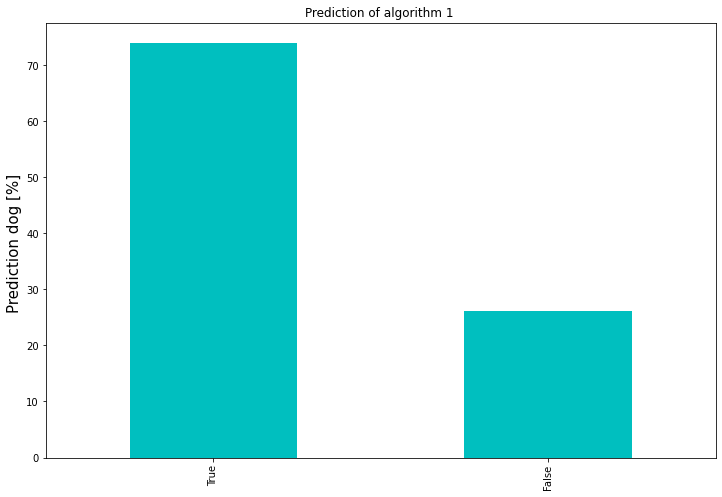

In [60]:
ax1 = ((df_all.predict1_dog.value_counts()/df_all.shape[0])*100).plot(kind ="bar", figsize = (12,8), color="c")

ax1.set_ylabel("Prediction dog [%] ", fontsize = 15);
ax1.set_title("Prediction of algorithm 1 ");


In [61]:
# Prediction 2: 

df_all["predict2_dog"].value_counts()/df_all.shape[0]

True     0.748673
False    0.251327
Name: predict2_dog, dtype: float64

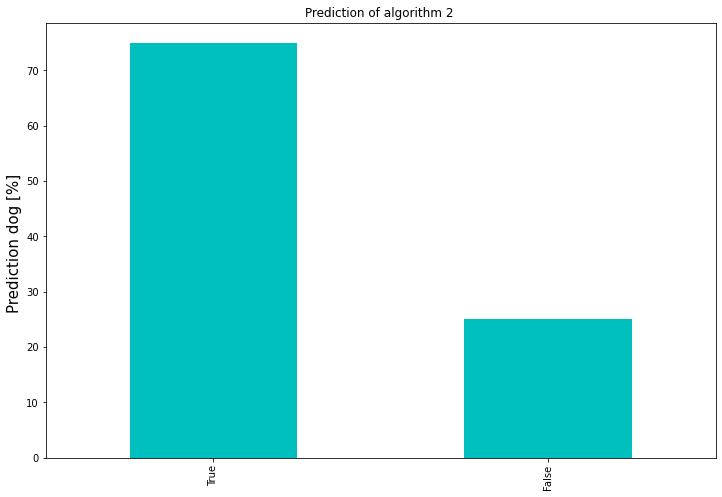

In [62]:
ax2 = ((df_all["predict2_dog"].value_counts()/df_all.shape[0])*100).plot(kind ="bar", figsize = (12,8), color ="c")

ax2.set_ylabel("Prediction dog [%] ", fontsize = 15);
ax2.set_title("Prediction of algorithm 2 ");


In [63]:
df_all["predict3_dog"].value_counts()/df_all.shape[0]

True     0.722624
False    0.277376
Name: predict3_dog, dtype: float64

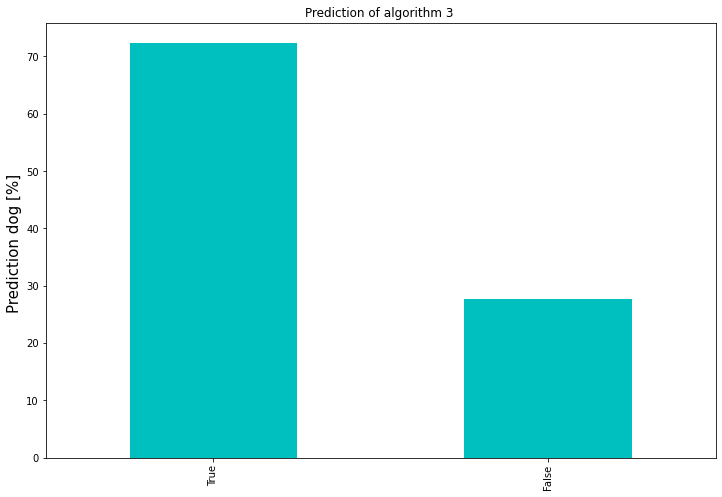

In [64]:
ax3 = ((df_all["predict3_dog"].value_counts()/df_all.shape[0])*100).plot(kind ="bar", figsize = (12,8), color = "c")

ax3.set_ylabel("Prediction dog [%] ", fontsize = 15);
ax3.set_title("Prediction of algorithm 3 ");

The performance of the algorithms is almost similar around 3/4 identified clearly that the image was a dog and 1/4 was found out to be false.
Among the three algorithms, the second algorithm slightly performanced well. 

In [225]:
mean_favorite = np.mean(df_all["favorite_count"])
std_favorite =  np.std(df_all["favorite_count"])
threshold = 2
mean_to_value = abs(df_all["favorite_count"]-  mean_favorite)

not_outlier = not_outlier =  mean_to_value < threshold * std_favorite

df_favorite = df_all.loc[not_outlier, ["timestamp", "favorite_count"]].reset_index()

df_favorite.drop(columns = "index", inplace = True)

df_favorite

,timestamp,favorite_count
0,2017-07-31 00:18:03+00:00,25461
1,2017-07-29 00:08:17+00:00,20562
2,2017-07-28 16:27:12+00:00,12041
3,2017-07-27 16:25:51+00:00,28226
4,2017-07-26 15:59:51+00:00,32467
...,...,...
1979,2015-11-16 00:24:50+00:00,111
1980,2015-11-16 00:04:52+00:00,311
1981,2015-11-15 23:21:54+00:00,128
1982,2015-11-15 23:05:30+00:00,132


In [243]:
mean_retweet = np.mean(df_all["retweet_count"])
std_retweet=  np.std(df_all["retweet_count"])
threshold = 2
mean_to_value = abs(df_all["retweet_count"]-  mean_retweet)

not_outlier = not_outlier =  mean_to_value < threshold * std_retweet

df_retweet= df_all.loc[not_outlier, ["timestamp", "retweet_count"]].reset_index()

df_retweet.drop(columns = "index", inplace = True)

df_retweet

,timestamp,retweet_count
0,2017-08-01 16:23:56+00:00,8853
1,2017-08-01 00:17:27+00:00,6514
2,2017-07-31 00:18:03+00:00,4328
3,2017-07-30 15:58:51+00:00,8964
4,2017-07-29 16:00:24+00:00,9774
...,...,...
2001,2015-11-16 00:24:50+00:00,41
2002,2015-11-16 00:04:52+00:00,147
2003,2015-11-15 23:21:54+00:00,47
2004,2015-11-15 23:05:30+00:00,48


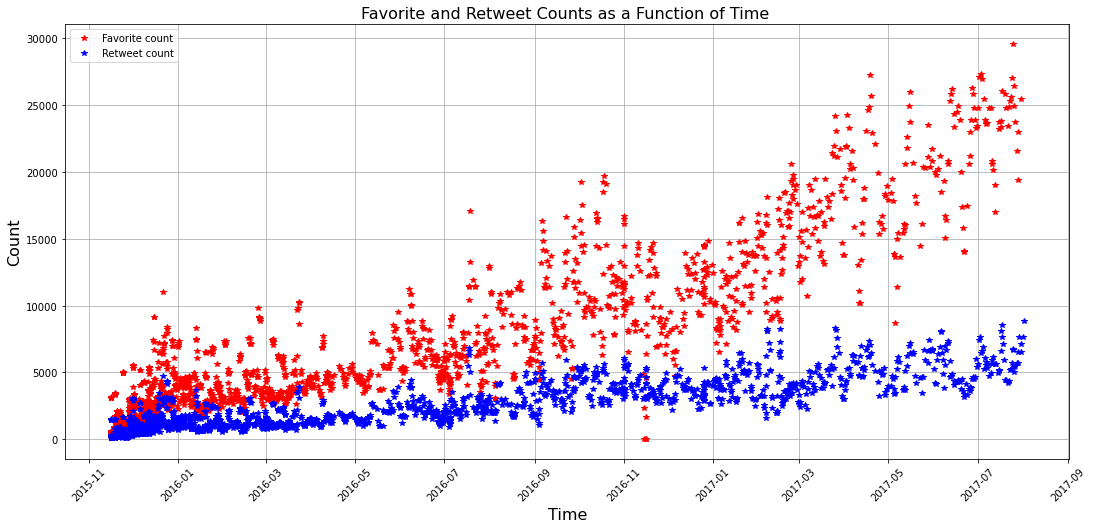

In [247]:

fig, ax = plt.subplots(figsize= (18,8))

plt.plot(df_favorite["timestamp"], df_favorite["favorite_count"].rolling(5, min_periods=1).mean(), "r*", label ="Favorite count")
plt.plot(df_retweet["timestamp"], df_retweet["retweet_count"].rolling(5, min_periods=1).mean(), "b*", label ="Retweet count")

plt.xlabel("Time", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Favorite and Retweet Counts as a Function of Time ", fontsize = 16)
plt.legend(loc = "best")
plt.grid()

plt.xticks(rotation=45)

plt.show()

As we see in the above gragh, the favorite counts and retweet counts show an increasing trend. Nevertheless the retweet counts remain below that of the favorite counts throughout the time frame. 

In [248]:
## Which prediction confience was the best? 

df_predict_conf = df_all.loc[:,["timestamp", "predict1_conf", "predict2_conf", "predict3_conf"]].copy()

df_predict_conf["predict1_mean"] = df_predict_conf["predict1_conf"].rolling(5,min_periods=1).mean()
df_predict_conf["predict2_mean"] = df_predict_conf["predict2_conf"].rolling(5,min_periods=1).mean()
df_predict_conf["predict3_mean"] = df_predict_conf["predict3_conf"].rolling(5,min_periods=1).mean()

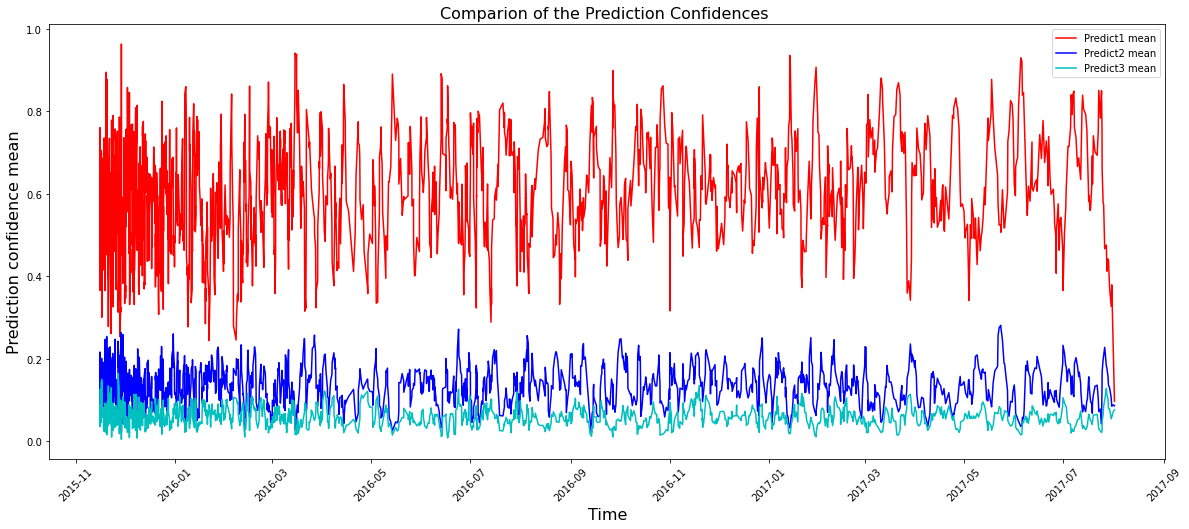

In [238]:
fig, ax = plt.subplots(figsize= (20,8))
                   
plt.plot(df_predict_conf["timestamp"], df_predict_conf["predict1_mean"], "r-", label= "Predict1 mean")
plt.plot(df_predict_conf["timestamp"], df_predict_conf["predict2_mean"], "b-", label ="Predict2 mean")
plt.plot(df_predict_conf["timestamp"], df_predict_conf["predict3_mean"], "c-", label ="Predict3 mean")

plt.xlabel("Time", fontsize = 16)
plt.ylabel("Prediction confidence mean", fontsize = 16)
plt.title("Comparion of the Prediction Confidences ", fontsize = 16)
plt.legend(loc = "best")
plt.xticks(rotation=45)

plt.show()

Interestingly, the first prediction confidence is found out to be the best prediction among the three with values above 0.3. While the second and third prediction confidences were below 2 but 
close to each other.

In [241]:
df_all.retweet_count

0       8853
1       6514
2       4328
3       8964
4       9774
        ... 
2068      41
2069     147
2070      47
2071      48
2072     532
Name: retweet_count, Length: 2073, dtype: int64

##### Writing the data frame into csv file

In [249]:
## Saving the data frame into csv file

def write_csv(df):
    
    ''' This function writes a pandas DataFrame into a csv file'''
    
    
    with open("twitter_archive_master.csv", "w", encoding ="utf-8") as file_object:
        
        df_to_csv = df_all.to_csv(file_object, index = False) 
        
    return df_to_csv

write_csv = write_csv(df_all)